# Project: TMDb 5000 Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
At this project, we will be analyzing data associated with movies from The Movie Database.
In particular we will be interested in finding trends among the movies from their budgets, revenues, runtime, and popularity.
To start we will need to import some packages ...


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

We'll being with reading the data and looking at it's info ...

In [208]:
df = pd.read_csv('tmdb_5000_movies.csv');
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Now, let's drop unneeded columns and also take a look at it ...

In [209]:
df.drop(['genres', 'homepage', 'id', 'keywords',
        'original_language', 'original_title', 'overview', 'production_companies',
        'production_countries', 'release_date', 'status', 'tagline',
        'vote_count', 'spoken_languages', 'vote_average'], axis=1, inplace=True);
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      4803 non-null   int64  
 1   popularity  4803 non-null   float64
 2   revenue     4803 non-null   int64  
 3   runtime     4801 non-null   float64
 4   title       4803 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 187.7+ KB


### Data Cleaning
We are missing two runtime values, so, let's fill them with the mean...

In [210]:
df.fillna(df.mean(), inplace=True);
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      4803 non-null   int64  
 1   popularity  4803 non-null   float64
 2   revenue     4803 non-null   int64  
 3   runtime     4803 non-null   float64
 4   title       4803 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 187.7+ KB


Let's also make sure we don't have any duplicate rows...

In [211]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis
Its the time to explore the data...

In [212]:
df.head()

,budget,popularity,revenue,runtime,title
0,237000000,150.437577,2787965087,162.0,Avatar
1,300000000,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End
2,245000000,107.376788,880674609,148.0,Spectre
3,250000000,112.312950,1084939099,165.0,The Dark Knight Rises
4,260000000,43.926995,284139100,132.0,John Carter


In [213]:
df.describe()

,budget,popularity,revenue,runtime
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859
std,4.072239e+07,31.816650,1.628571e+08,22.607225
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000
75%,4.000000e+07,28.313505,9.291719e+07,117.500000
max,3.800000e+08,875.581305,2.787965e+09,338.000000


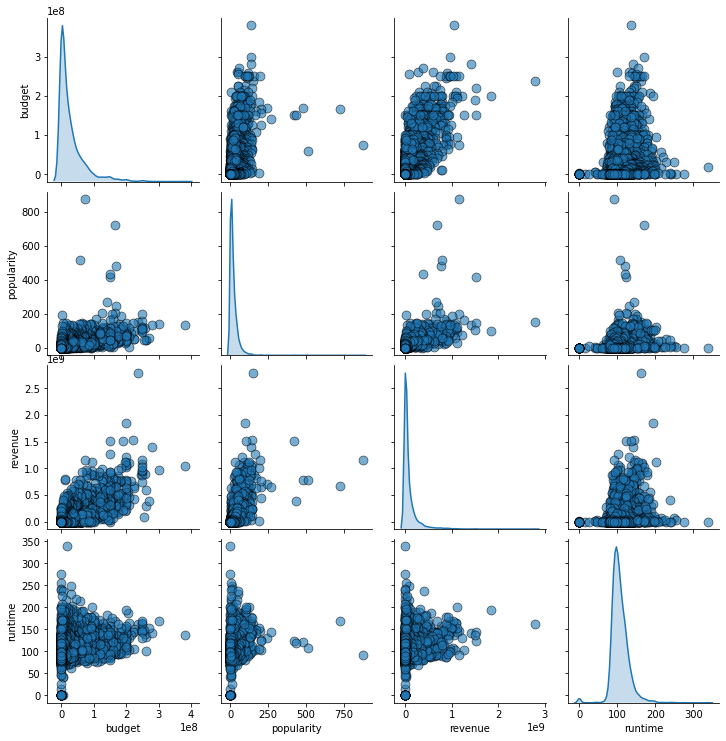

In [214]:
sns.pairplot(df,
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});


### How does the runtime of movies vary?
We can see from the below data chart that most movies have runtime that is around 2 hours.

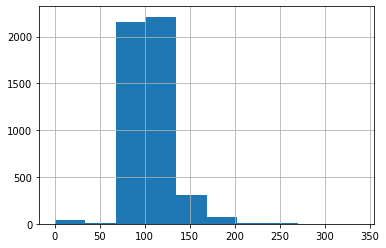

In [215]:
runtime = df['runtime']
runtime.hist()


### Are movies revenues always larger than their budgets?
As we can see from the above calculations, revenues are not always grater than budgets.

In [216]:
movies_with_revenues_greaterthan_budgets = sum(df['revenue'] > df['budget'])
movies_with_revenues_greaterthan_budgets


2585

### Do movies with high revenues always have higher popularity?
We can look at the below charts and tell that is this is not the case. There is no clear answer to that.

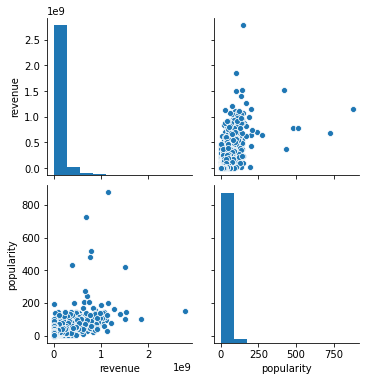

In [217]:
sns.pairplot(df[['revenue', 'popularity']]);


### Does having a larger budget makes a movie more popular?
From the below charts, we can see that the larger budget we have the higher popularity a movie can get but it is not always the case.

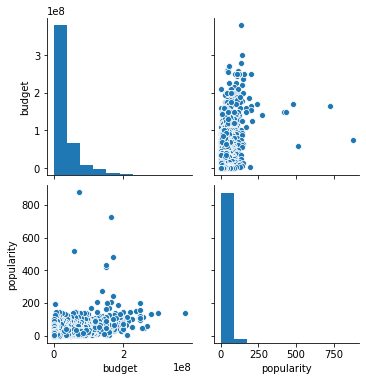

In [218]:
sns.pairplot(df[['budget', 'popularity']]);

### Does a movie with a longer runtime requires more budget?
We can say that this is not true from looking at the below charts.

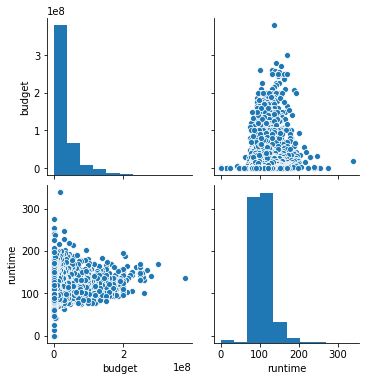

In [219]:
sns.pairplot(df[['budget', 'runtime']]);

### Does a movie with a longer runtime have more popularity?
We can say that, also, this is not the case from looking at the below charts.

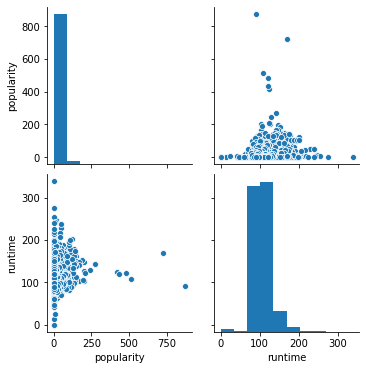

In [220]:
sns.pairplot(df[['popularity', 'runtime']]);

<a id='conclusions'></a>
## Conclusions
We have answered different question regarding the movies dataset we have, and honestly these answers are interesting.
When we know that a larger budget for a movie will not make it more popular, this is kind of a thing that may encourage people with small budgets to produce movies.
Though, I think we need a larger dataset and more exploration to be able to get more useful and reliable findings.
















